

# **Operações aritméticas e Bitwise**

#### **Aprenderemos:**
1. Operações aritméticas
2. Operações Bitwise

In [5]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


## **Operações Aritméticas**

Estas são operações simples que nos permitem adicionar ou subtrair diretamente a intensidade da cor.

Calcula a operação por elemento de duas matrizes. O efeito geral é aumentar ou diminuir o brilho.

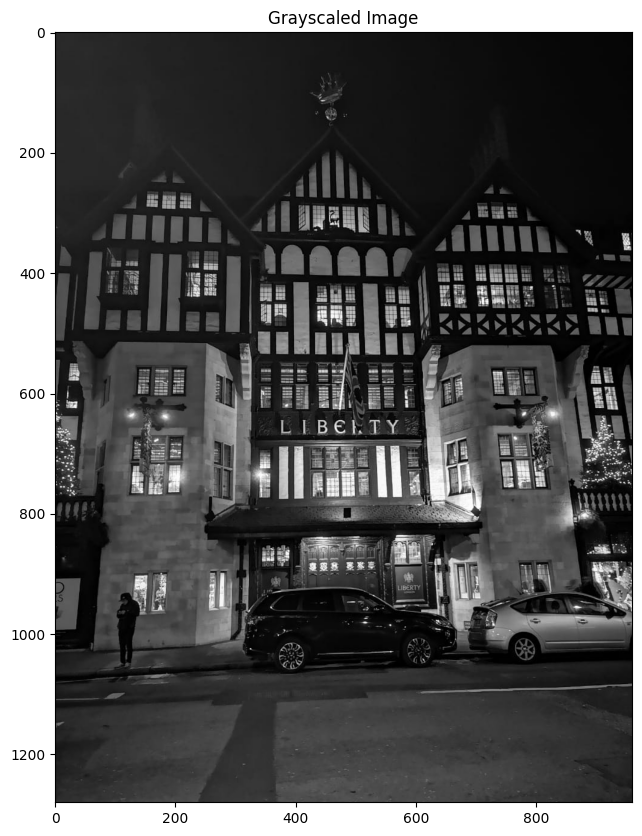

[[41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 ...
 [41 42 44 ... 34 33 32]
 [43 44 46 ... 31 30 28]
 [44 45 46 ... 32 30 29]]


In [ ]:
# Se passamos somente o canal 0 na imagem, como segundo parametro, podemos já transformar em uma imagem com escala de cinza
image = cv2.imread('images/liberty.jpeg', 0)
imshow("Grayscaled Image",image)
print(image)

# Criando uma matriz de 1's para multiplicar por 100.
# Criamos uma matriz com as mesmas dismensões da imagem original e multiplicamos por 100
M = np.ones(image.shape, dtype = "uint8") * 100 



In [32]:
print(M) #matriz gerada

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


#### **Increasing Brightness**

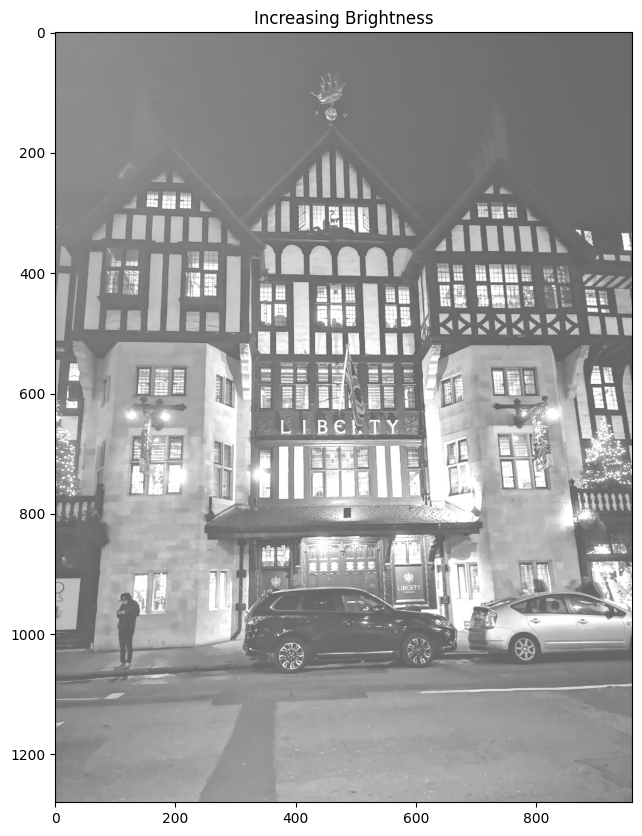

In [37]:
# Utilizamos a função .add() para adicionar a matriz de 100's a nossa imagem, adicionando o valor de 100 em cada pixel
# É feita a soma de 100 em cada pixel, porém na função add() é garantido que o valor não estoure 255, caso estoure, o valor que fica é 255.
added = cv2.add(image, M)
imshow("Increasing Brightness", added)


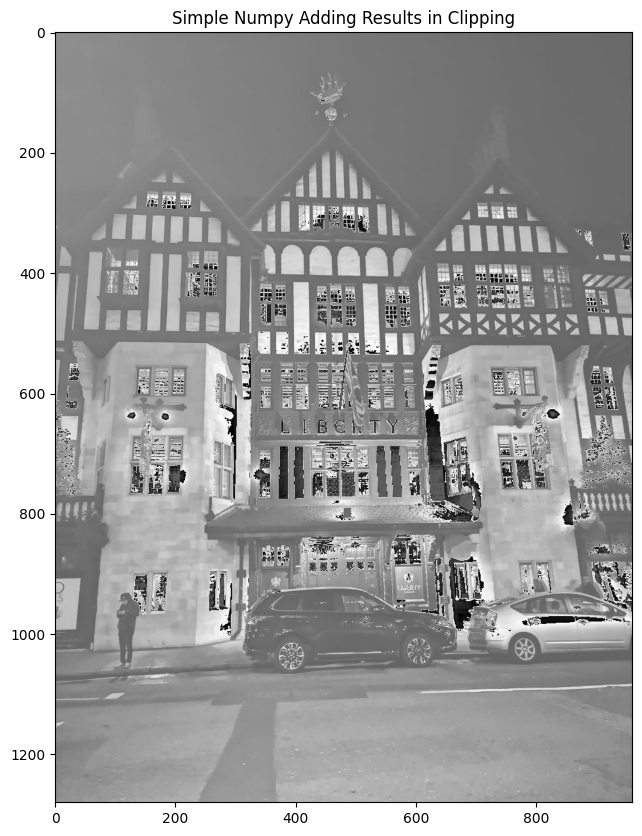

In [38]:
# Agora, se apenas adicionarmos, veja o que acontece.
added2 = image + M 
imshow("Simple Numpy Adding Results in Clipping", added2)


#Aqui vemos que a soma simples não garante o não-estouro de intensidade. 
# Por exemplo, um pixel de valor 250 ao somar 100 resultaria em 350, mas ele é truncado para 94 (350 - 256, ou seja, mais escuro) devido ao comportamento modular.

DESAFIO:

Adicionar brilho em cada canal separadamente. 

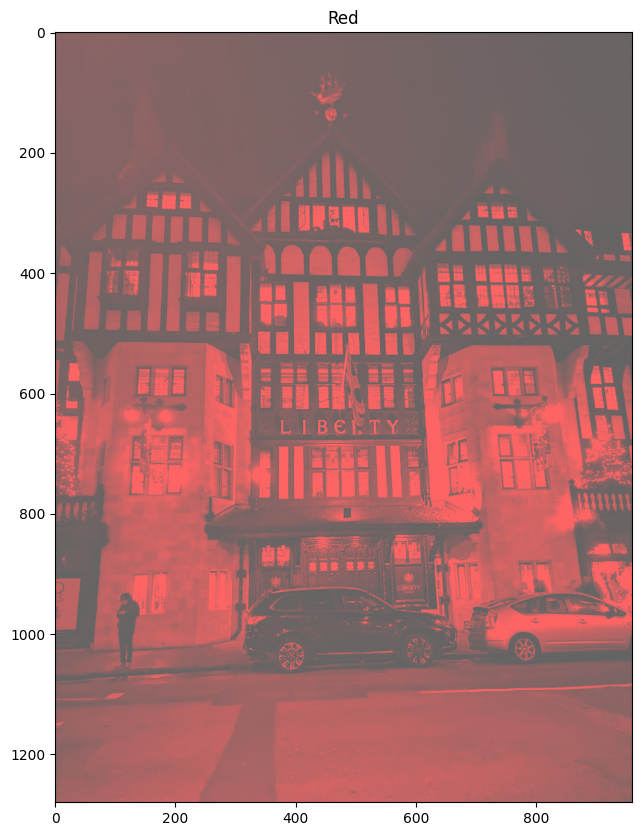

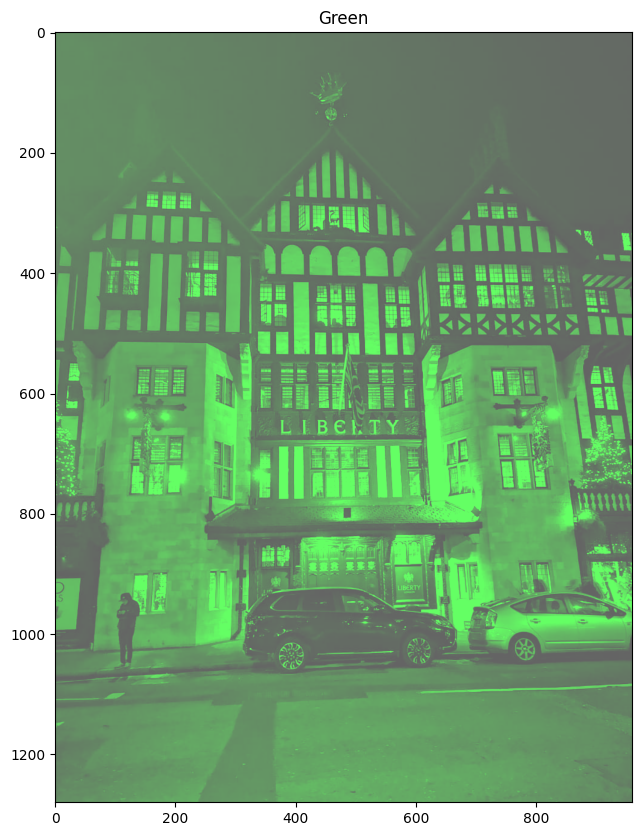

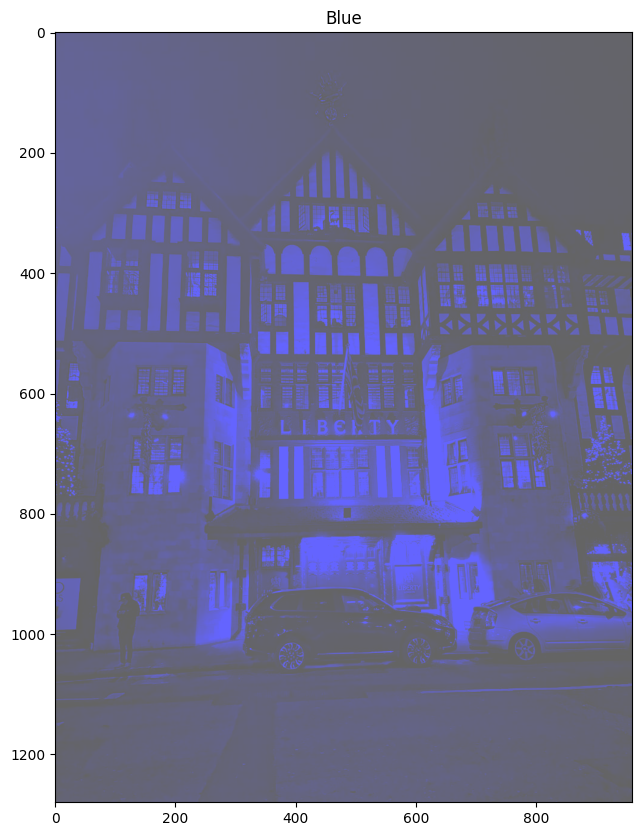

In [39]:
image = cv2.imread('images/liberty.jpeg')
# Usamos a função cv2.split para pegar cada canal separadamente
B, G, R = cv2.split(image)

# função zeros do numpy, retorna uma matriz com as dimensões passadas.
zeros = np.zeros(image.shape[:2], dtype = "uint8")

M = np.ones(image.shape, dtype = "uint8") * 100 

imshow("Red", cv2.add(cv2.merge([zeros, zeros, R]), M)) #Preenchendo para a imagem em vermelho e adicionando brilho ao canal
imshow("Green", cv2.add(cv2.merge([zeros, G, zeros]),M))
imshow("Blue", cv2.add(cv2.merge([B, zeros, zeros]), M))

#### **Diminuindo o brilho**

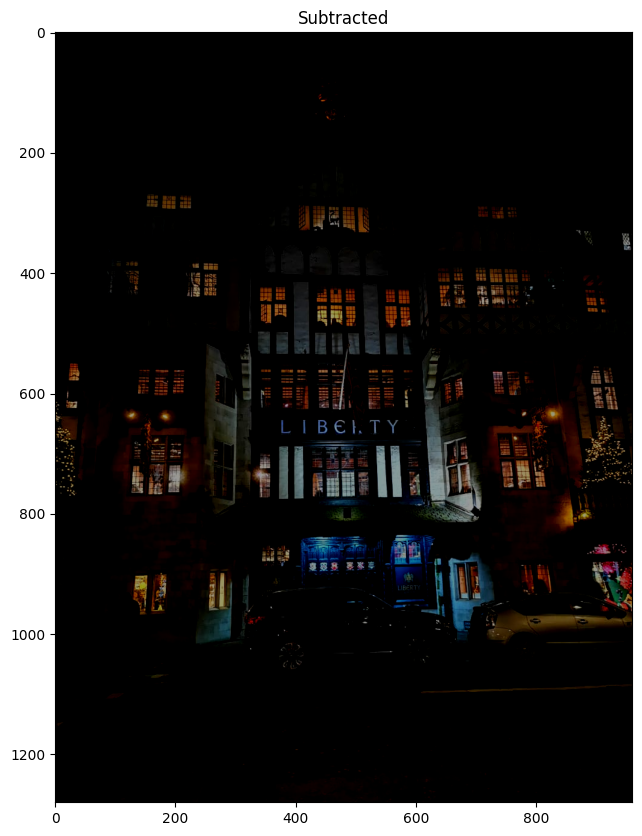

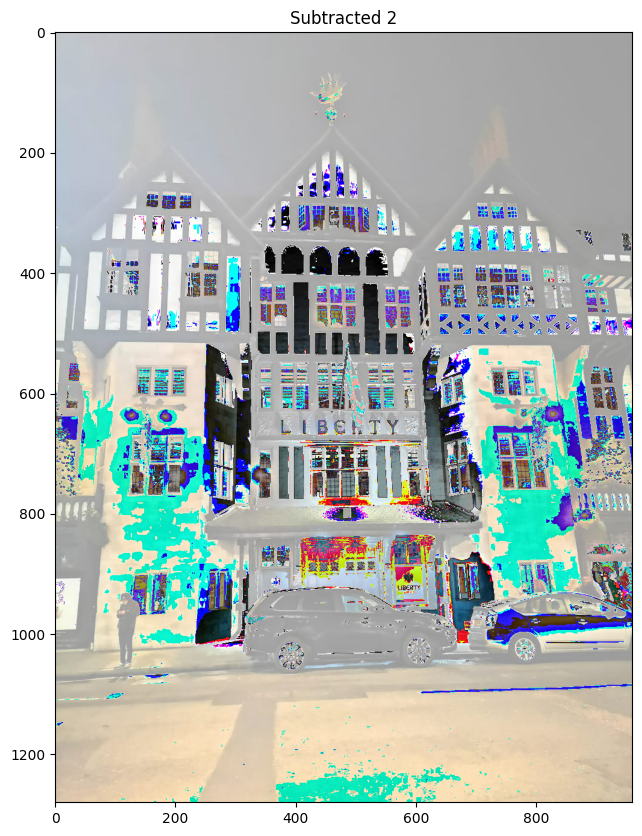

In [ ]:
# Temos a função de subtração
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

# Mesmo efeito da soma simples, não garantimos o não estouro do pixel
subtracted = image - M 
imshow("Subtracted 2", subtracted)


## **Operações Bitwise e Masking**



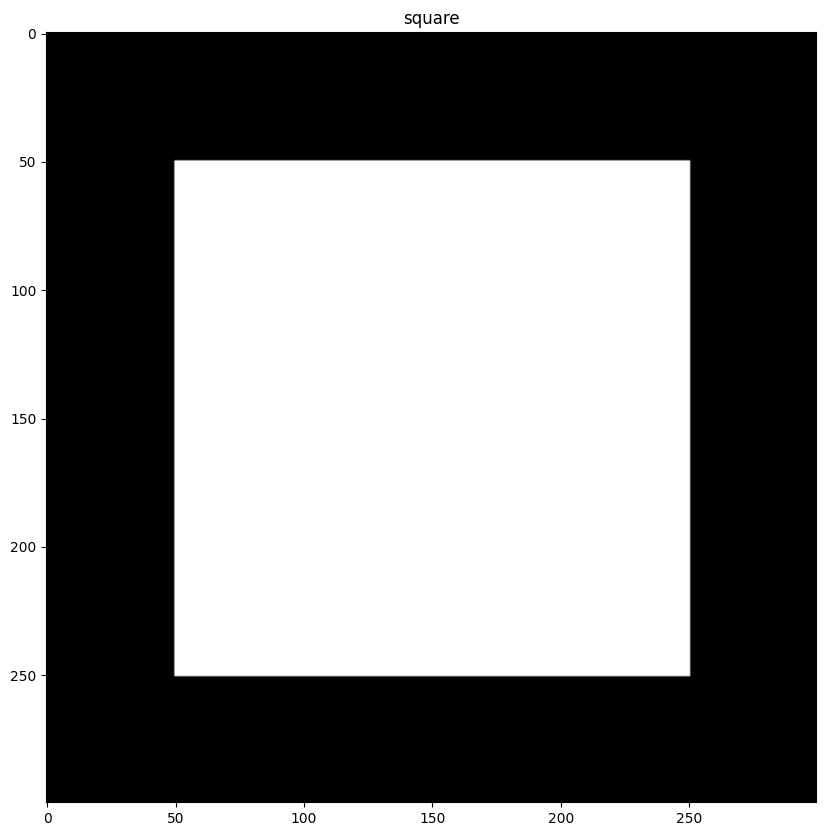

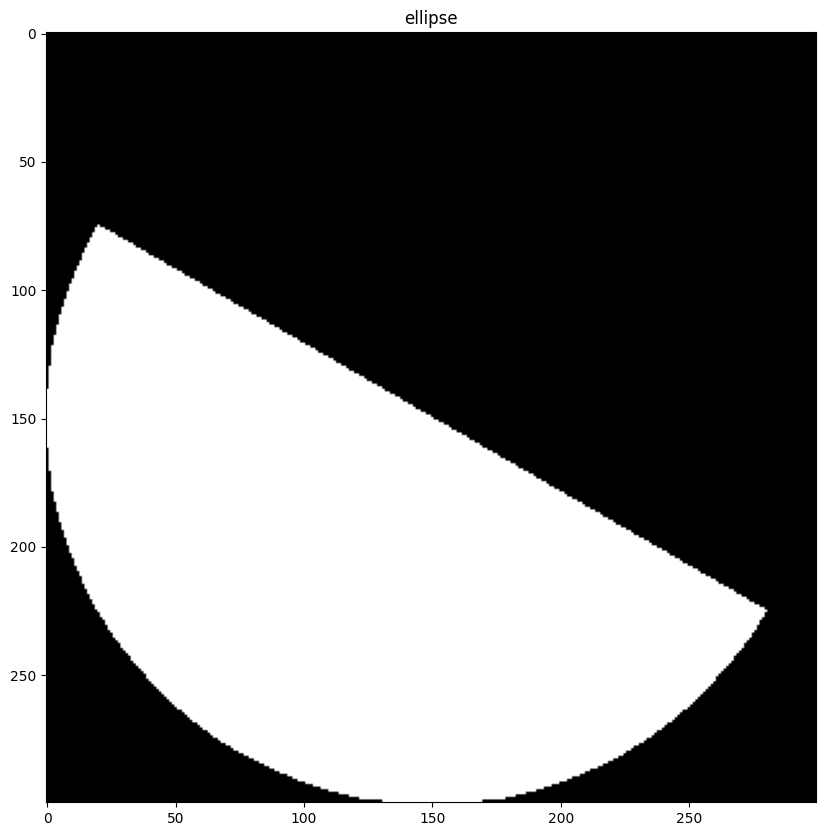

In [ ]:
# Vamos criar uma imagem em escala de cinza

# criando um quadrado 300 x 300
square = np.zeros((300, 300), np.uint8)
#retangulo 250 x 250, com preenchimento
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)
imshow("square", square)

# Fazendo uma elipse
ellipse = np.zeros((300, 300), np.uint8)

#função .ellipse recebe: 
""""
image: A imagem onde a elipse será desenhada.
center: Coordenadas (x,y)do centro da elipse.
axes: O tamanho do eixo da elipse. É dado como uma tupla
angulo: O ângulo de rotação da elipse em relação ao eixo horizontal da imagem, em graus
startAngle e endAngle: Define o intervalo do arco em graus (em sentido anti-horário).
cor
borda: 
"""
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

### **Experimentando algumas operações bitwise, como AND, OR, XOR e NOT**

Em operações de bits, um pixel é considerado "ativo" ou "ligado" se seu valor é qualquer número maior que 0, independentemente de seu valor específico. Portanto:

- "Ativado" significa que o pixel tem um valor diferente de 0.
- "Desativado" significa que o pixel tem valor 0 (preto em imagens de 8 bits, por exemplo).

Bitwise AND (cv2.bitwise_and)

- Retorna uma imagem onde cada pixel é o resultado de uma operação AND entre os pixels das imagens de entrada.
- Um pixel resultante será "ligado" (1) apenas se o pixel correspondente for 1 em ambas as imagens.
- Aplicação: Útil para aplicar máscaras e combinar regiões de duas imagens onde ambos os pixels são ativados.

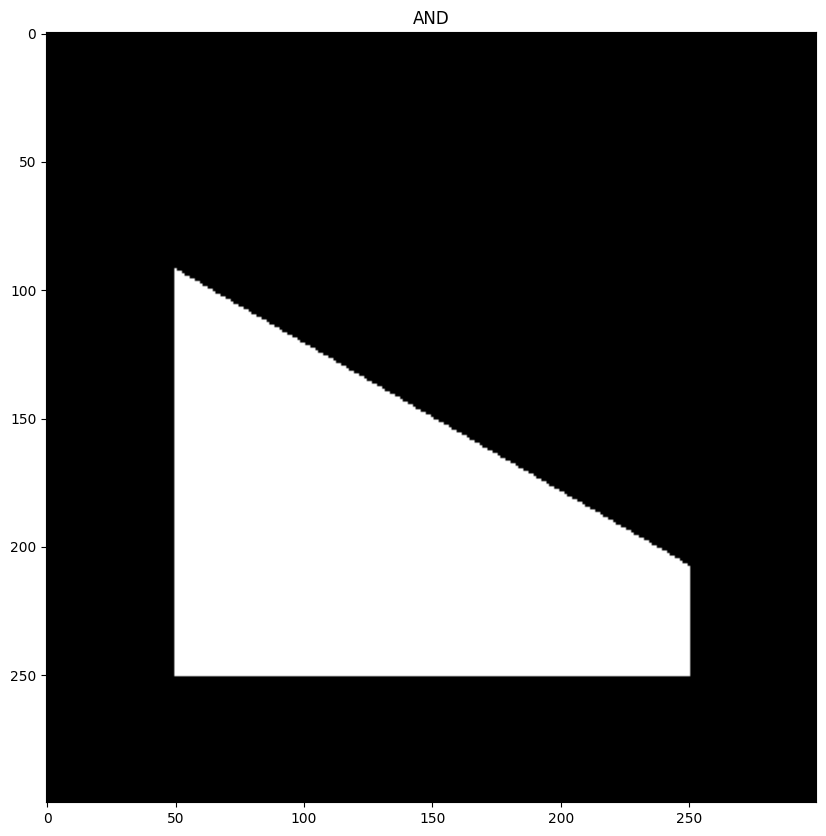

In [50]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

Bitwise OR (cv2.bitwise_or)

- Retorna uma imagem onde cada pixel é o resultado de uma operação OR entre os pixels das imagens de entrada.
- Um pixel resultante será "ligado" se o pixel correspondente for 1 em pelo menos uma das duas imagens.
- Aplicação: Combinação de duas imagens ou para criar máscaras que abrangem áreas onde qualquer uma das condições é verdadeira.

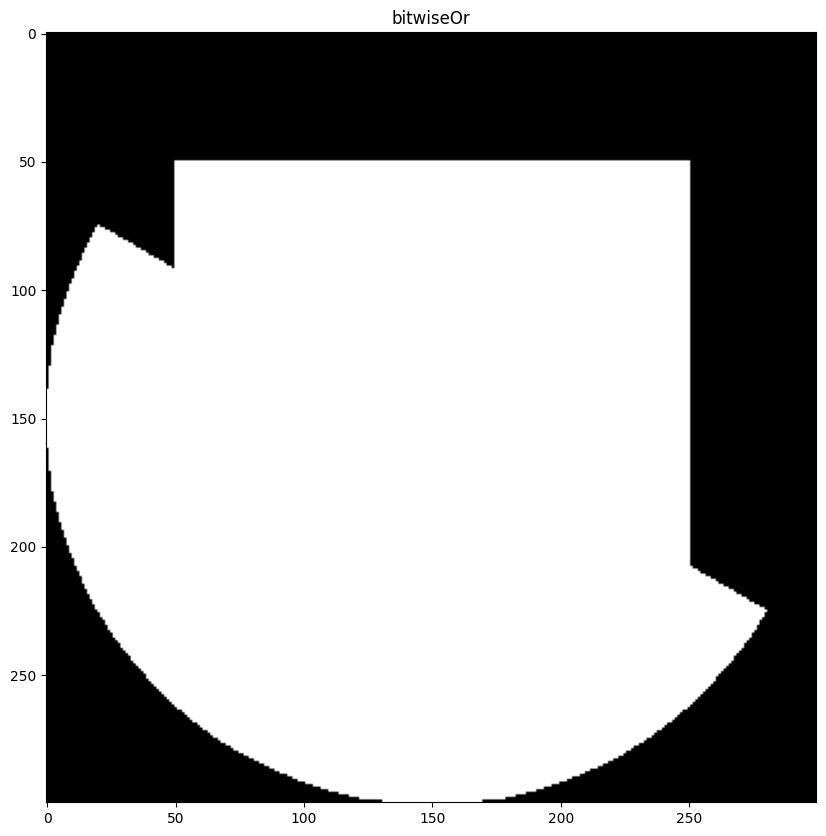

In [51]:
# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

Bitwise XOR (cv2.bitwise_xor)

- Retorna uma imagem onde cada pixel é o resultado de uma operação XOR entre os pixels das imagens de entrada.
- Um pixel resultante será "ligado" se um dos pixels for 1 em uma imagem, mas 0 na outra (não em ambas ao mesmo tempo).
- Aplicação: Detecção de diferenças entre duas imagens, onde regiões semelhantes são "apagadas" e diferenças ficam destacadas.

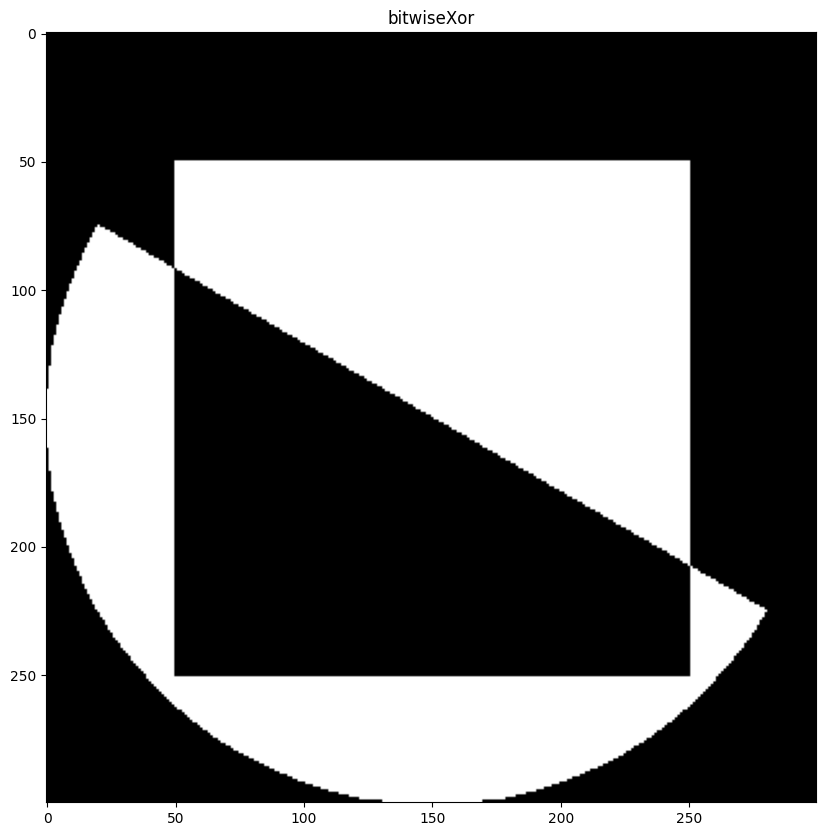

In [52]:
# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

Bitwise NOT (cv2.bitwise_not)

- Inverte os bits de cada pixel em uma única imagem, transformando pixels "ligados" em "desligados" e vice-versa.
- Aplicação: Criação de inversão de imagem, principalmente em máscaras.

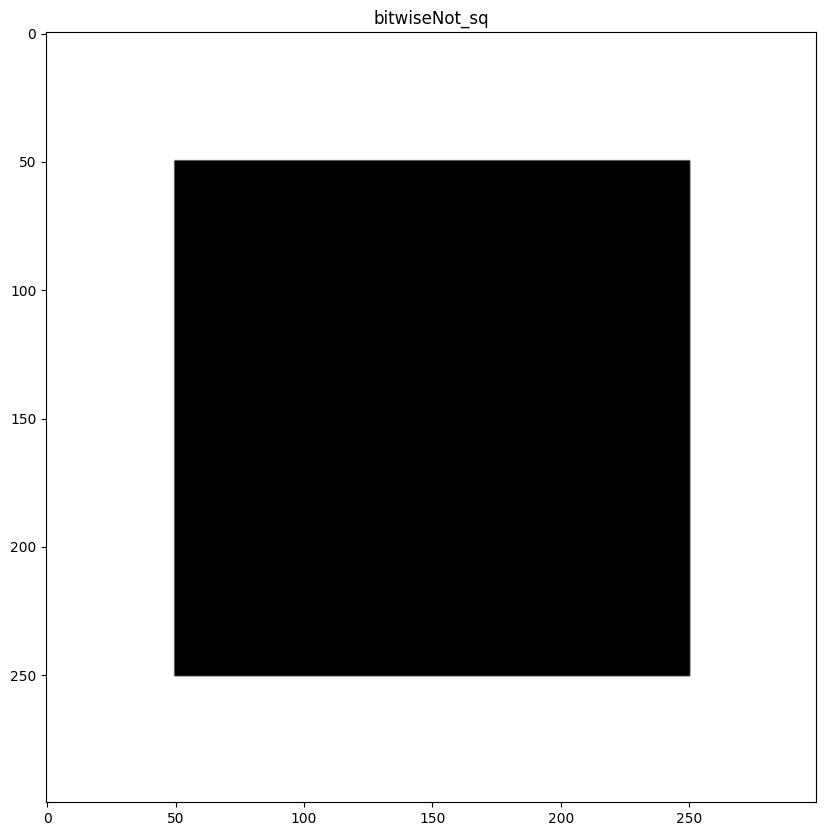

In [53]:

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally